In [ ]:
from google.colab import files
files=files.upload()

Saving heart_modified.csv to heart_modified.csv


In [ ]:
# Make necessary import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, accuracy_score

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
#Read the data 
heart_data_df = pd.read_csv('/content/heart_modified.csv')

In [ ]:
#Get the head
heart_data_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,65,M,ASY,114,318,ST,140,N,4.4,Down,1
1,62,M,ASY,128,223,ST,119,Y,2.0,Down,1
2,56,M,ASY,140,298,Normal,122,Y,4.2,Flat,1
3,59,M,ASY,180,285,ST,120,Y,1.5,Flat,1
4,71,M,ASY,185,0,Normal,98,Y,0.0,Up,1


In [ ]:
#Get the shape
print(heart_data_df.shape)

(918, 11)


In [ ]:
#Get the info regarding data
print(heart_data_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   RestingECG      918 non-null    object 
 6   MaxHR           918 non-null    int64  
 7   ExerciseAngina  918 non-null    object 
 8   Oldpeak         918 non-null    float64
 9   ST_Slope        918 non-null    object 
 10  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 79.0+ KB
None


In [ ]:
#Check whether there are duplicates in the data
print(heart_data_df.drop_duplicates(inplace=True))
print(heart_data_df.isna().sum())

None
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [ ]:
#describe the data
heart_data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,59.218954,11.317997,29.0,51.00,60.0,67.0,87.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


[Text(1, 0.5, 'Cholesterol'),
 Text(1, 1.5, 'MaxHR'),
 Text(1, 2.5, 'RestingBP'),
 Text(1, 3.5, 'Age'),
 Text(1, 4.5, 'Oldpeak'),
 Text(1, 5.5, 'HeartDisease')]

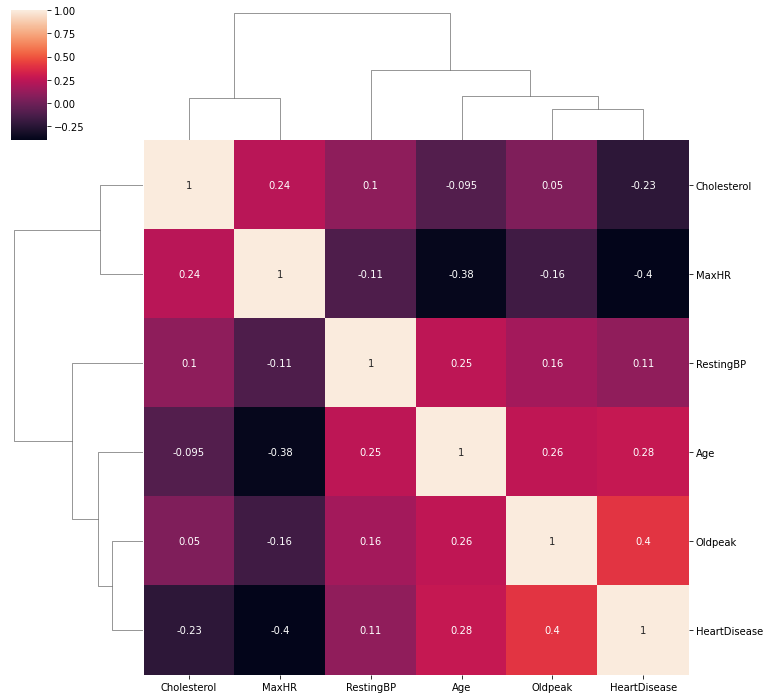

In [ ]:
#correlation between data
heart_data_corr = heart_data_df.corr()
plot_corr = sns.clustermap(data = heart_data_corr,
                           metric="correlation",
                           annot=True,
                           )
plot_corr.ax_heatmap.set_yticklabels(plot_corr.ax_heatmap.get_yticklabels(),
                                     rotation=0)

In [ ]:
#Heart Disease ratio
fig = px.histogram(heart_data_df,
                   x='HeartDisease',
                   color='HeartDisease'
                   )
fig.update_layout(barmode="overlay")
fig.show()

In [ ]:
#Ratio of Sex
fig = px.histogram(heart_data_df,
                   x='Sex',
                   color='Sex',
                   )
fig.show()

In [ ]:
#Distribution of Age
Age_data = pd.DataFrame(heart_data_df['HeartDisease'].groupby(heart_data_df['Age']).count()).reset_index()
fig = px.bar(Age_data,
             x='Age',
             y='HeartDisease'
             )
fig.show()

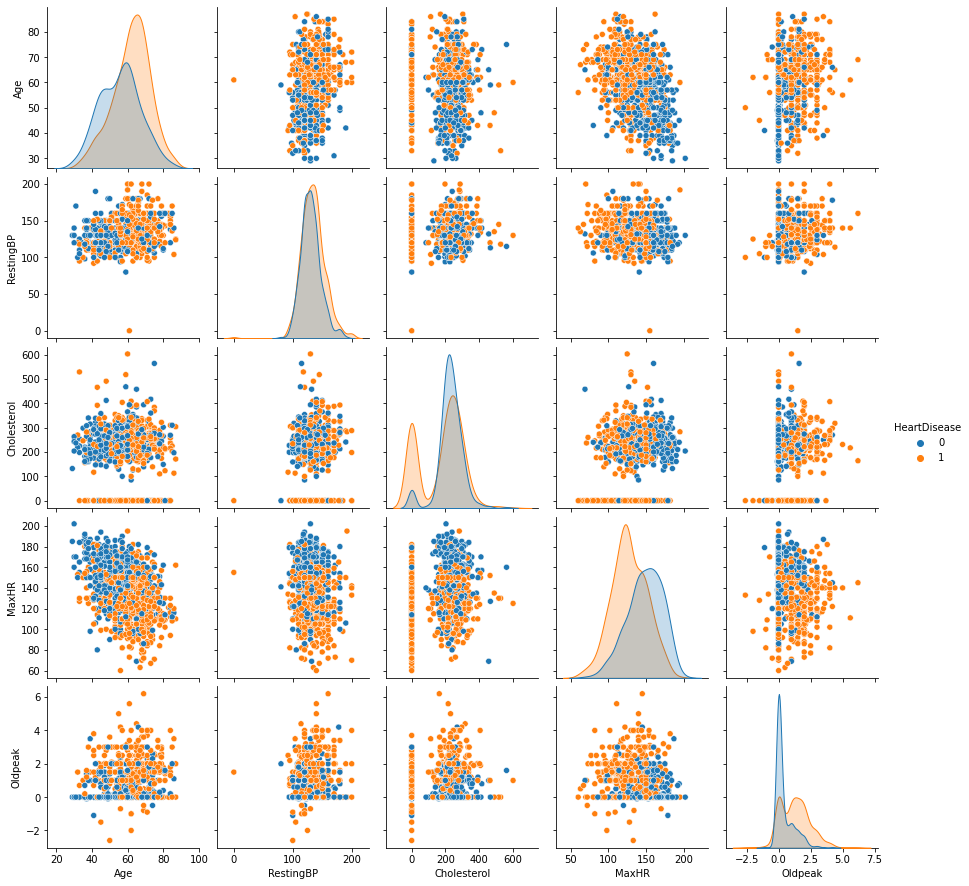

In [ ]:
sns.pairplot(heart_data_df, diag_kind='kde', hue="HeartDisease")

In [ ]:
#pre processing the data

#categorical columns 
heart_data_df_encoded = pd.get_dummies(heart_data_df)
heart_data_df_encoded

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,65,114,318,140,4.4,1,0,1,1,0,0,0,0,0,1,1,0,1,0,0
1,62,128,223,119,2.0,1,0,1,1,0,0,0,0,0,1,0,1,1,0,0
2,56,140,298,122,4.2,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0
3,59,180,285,120,1.5,1,0,1,1,0,0,0,0,0,1,0,1,0,1,0
4,71,185,0,98,0.0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,60,108,267,167,0.0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1
914,57,120,182,150,0.0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0
915,71,140,187,144,4.0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,1
916,42,120,200,160,1.0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0


In [ ]:
X, y = heart_data_df_encoded.drop(['HeartDisease'],axis=1), heart_data_df_encoded['HeartDisease']

#normalizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#splitting the data into test and train 
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.2, random_state=0)
#print(X_train, X_test, y_train, y_test)

accuracy score: 0.8478260869565217
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        82
           1       0.87      0.85      0.86       102

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



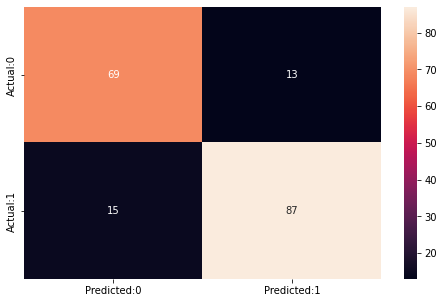

In [ ]:
# First classifier as Logistic Regression 
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_y_pred=logreg.predict(X_test)

print(f'accuracy score: {accuracy_score(y_test, logreg_y_pred)}')
print(classification_report(y_test, logreg_y_pred))

cm=confusion_matrix(y_test, logreg_y_pred)
conf_matrix=pd.DataFrame(data=cm, columns=['Predicted:0', 'Predicted:1'] , index=['Actual:0', 'Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True, fmt='d')

The accuracy score of our model is approx. 0.85. <br>

Positive predictive value is 0.87 while Negative predictive value is 0.82. <br>

The sensitivity (the percentage of people with heartdisease who were correctly identified) is 0.85. <br> 

The specificity (the percentage of people without heartdisease who were correctly identified) is 0.84. 

accuracy score: 0.8586956521739131
              precision    recall  f1-score   support

           0       0.83      0.85      0.84        82
           1       0.88      0.86      0.87       102

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



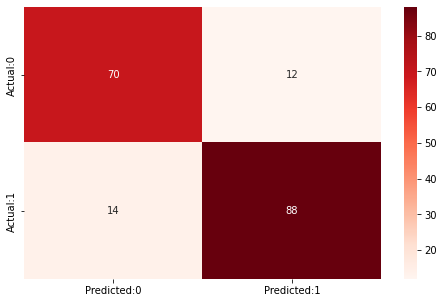

In [ ]:
# Second classifier as Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
RF_y_pred = random_forest.predict(X_test)
RF_proba =  random_forest.predict_proba(X_test)

print(f'accuracy score: {accuracy_score(y_test, RF_y_pred)}')
print(classification_report(y_test, RF_y_pred))

cm=confusion_matrix(y_test, RF_y_pred)
conf_matrix=pd.DataFrame(data=cm, columns=['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d', cmap="Reds")

The accuracy score of our model is approx. 0.86.

Positive predictive value is 0.88 while Negative predictive value is 0.83.

The sensitivity (the percentage of people with heartdisease who were correctly identified) is 0.86. <br>

The specificity (the percentage of people without heartdisease who were correctly identified) is 0.85.

Text(0, 0.5, 'roc_auc rate')

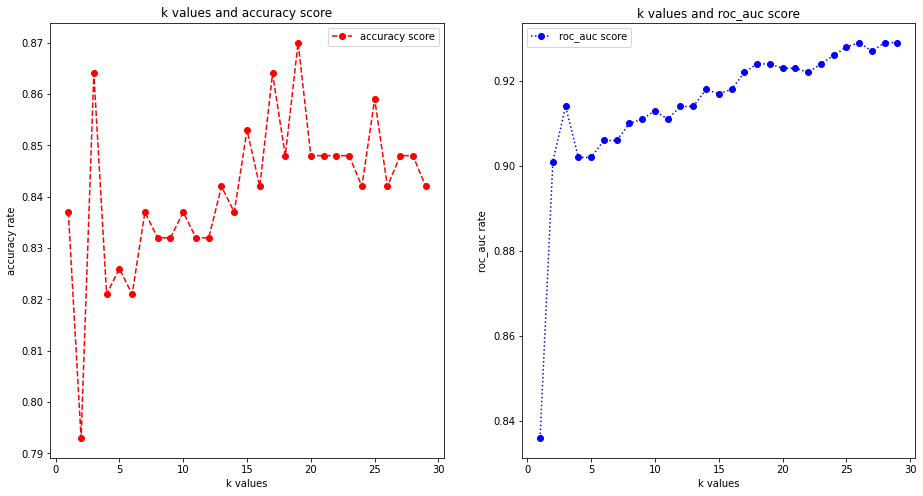

In [ ]:
# Third classifier as KNN
knn_acc_score = {}
knn_auc_score = {}
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    knn_y_pred = knn.predict(X_test)
    knn_proba = knn.predict_proba(X_test)
    acc = accuracy_score(y_test, knn_y_pred)
    knn_acc_score.update({f'n_neighbors={i}': round(acc, 3)})
    auc = roc_auc_score(y_test, knn_proba[ :, 1])
    knn_auc_score.update({f'n_neighbors={i}': round(auc, 3)})


#print(knn_acc_score, knn_auc_score)

fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(15.5, 8)
ax1.plot(range(1, 30), list(knn_acc_score.values()), linestyle='--', color = 'Red', marker='o', label='accuracy score')
ax2.plot(range(1, 30), list(knn_auc_score.values()), linestyle='dotted', marker='o', color = 'Blue', label='roc_auc score')

ax1.legend()
ax1.set_title('k values and accuracy score')
ax1.set_xlabel('k values')
ax1.set_ylabel('accuracy rate')

ax2.legend()
ax2.set_title('k values and roc_auc score')
ax2.set_xlabel('k values')
ax2.set_ylabel('roc_auc rate')

accuracy score: 0.8695652173913043
              precision    recall  f1-score   support

           0       0.87      0.83      0.85        82
           1       0.87      0.90      0.88       102

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



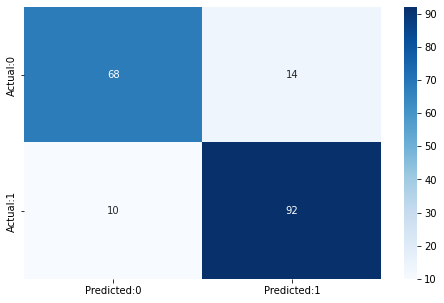

In [ ]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train,y_train)
knn_y_pred = knn.predict(X_test)
knn_proba = knn.predict_proba(X_test)

print(f'accuracy score: {accuracy_score(y_test,knn_y_pred)}')
print(classification_report(y_test, knn_y_pred))
cm=confusion_matrix(y_test,knn_y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d', cmap="Blues")

The accuracy score of our model is approx. 0.87.

Positive predictive value is 0.87 while Negative predictive value is also same.

The sensitivity (the percentage of people with heartdisease who were correctly identified) is 0.90.

The specificity (the percentage of people without heartdisease who were correctly identified) is 0.83.